In [1]:
from size_based_ecosystem import *
import imageio as imgio

In [2]:
new_spectral = spectral_method(30, 200)

In [3]:
def expander(old_spectral, new_spectral, transform_vec):
    length = old_spectral.x[-1]
    coeffs = np.linalg.inv(eco.spectral.JacobiP_n(2*old_spectral.x/length - 1, 0, 0, old_spectral.n).T) @ transform_vec
    transformer = new_spectral.JacobiP_n(2*new_spectral.x/new_spectral.x[-1] - 1, 0, 0, old_spectral.n).T
    return transformer @ coeffs

In [4]:
import matplotlib.pyplot as plt
import pickle as pkl
import imageio as imageio
frames_path = "images/images" + "{i}.jpg"
gif_path = "images/test_gif.gif"

In [5]:
with open('data/strategies_one_year_short_night.pkl', 'rb') as f:
    strategies = pkl.load(f)
with open('data/population_one_year_short_night.pkl', 'rb') as f:
    populations = pkl.load(f)
with open('data/eco_one_year_short_night.pkl', 'rb') as f:
    eco = pkl.load(f)
with open('data/resource_one_year_short_night.pkl', 'rb') as f:
    resources = pkl.load(f)
with open('data/periodic_layers_one_year_short_night.pkl', 'rb') as f:
    periodic_layers = pkl.load(f)
with open('data/losses_one_year_short_night.pkl', 'rb') as f:
    losses = pkl.load(f)
with open('data/rewards_one_year_short_night.pkl', 'rb') as f:
    rewards = pkl.load(f)


time = np.linspace(0,365,len(populations))
populations = np.array(populations)

In [6]:
with open('data/strategies_more_resources_short_night.pkl', 'rb') as f:
    strategies_more_resources = pkl.load(f)
with open('data/population_more_resources_short_night.pkl', 'rb') as f:
    populations_more_resources = pkl.load(f)
with open('data/eco_more_resources_short_night.pkl', 'rb') as f:
    eco_more_resources = pkl.load(f)
with open('data/resource_more_resources_short_night.pkl', 'rb') as f:
    resources_more_resources = pkl.load(f)
with open('data/periodic_layers_more_resources_short_night.pkl', 'rb') as f:
    periodic_layers_more_resources = pkl.load(f)
with open('data/losses_more_resources_short_night.pkl', 'rb') as f:
    losses_more_resources = pkl.load(f)
with open('data/rewards_more_resources_short_night.pkl', 'rb') as f:
    rewards_more_resources = pkl.load(f)
    
populations_more_resources = np.array(populations_more_resources)


In [7]:

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120), 
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150), 
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148), 
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199), 
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)



In [8]:
day_interval = 96
day = int(300*day_interval)
time_step = 1/day_interval
eco_params_orig = ecosystem_parameters(eco.parameters.mass_vector, eco.spectral)
OG_layered_attack = eco_params_orig.layered_attack.copy()
flows = np.zeros((day_interval, 2))

flows_more_res = np.zeros((day_interval, 2))

for i in range(day, day+day_interval):
    layered_attack = periodic_layers[i-day]
    T_G = graph_builder(eco, layered_attack = layered_attack, 
                  populations=populations[i], resources = resources[i], 
                  strategies = strategies[i])
    flows[i-(day), 0] = T_G[1,0]
    flows[i-(day), 1] = T_G[2,1]
    TG_M_R = graph_builder(eco, layered_attack = layered_attack, 
                  populations=populations_more_resources[i], resources = resources_more_resources[i], 
                  strategies = strategies_more_resources[i])
    
    flows_more_res[i-(day), 0] = T_G[1,0]
    flows_more_res[i-(day), 1] = T_G[2,1]


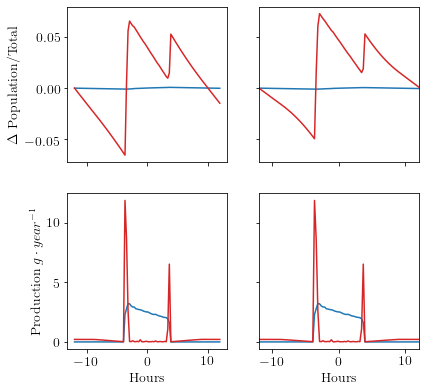

In [9]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey = 'row')
fig.set_size_inches((16/2.54, 16/2.54))

ax[0,1].plot(np.linspace(-12,12,day_interval), (populations[day:day+day_interval,0] - populations[day,0])/populations[day,0], color = tableau20[0], label = '20g fish')
ax[0,1].plot(np.linspace(-12,12,day_interval), (populations[day:day+day_interval,1] - populations[day,1])/populations[day,1], color = tableau20[6], label = '8000g fish')

ax[0,0].plot(np.linspace(-12,12,day_interval), (populations_more_resources[day:day+day_interval,0] - populations_more_resources[day,0])/populations_more_resources[day,0], color = tableau20[0], label = '20g fish')
ax[0,0].plot(np.linspace(-12,12,day_interval), (populations_more_resources[day:day+day_interval,1] - populations_more_resources[day,1])/populations_more_resources[day,1], color = tableau20[6], label = '8000g fish')



ax[1,1].plot(np.linspace(-12,12,day_interval), (flows[:,0]), color = tableau20[0], label = '20g fish')
ax[1,1].plot(np.linspace(-12,12,day_interval), (flows[:,1]), color = tableau20[6], label = '8000g fish')

ax[1,0].plot(np.linspace(-12,12,day_interval), (flows_more_res[:,0]), color = tableau20[0], label = '20g fish')
ax[1,0].plot(np.linspace(-12,12,day_interval), (flows_more_res[:,1]), color = tableau20[6], label = '8000g fish')



ax[1, 0].set_ylabel('Production $g \cdot year^{-1}$')
ax[0, 0].set_ylabel('$\Delta$ Population/Total')
ax[-1,0].set_xlabel("Hours")
ax[1,-1].set_xlabel("Hours")
ax[1,-1].set_xlim((-12,12))

plt.savefig("short_night_pop_dyn_cons_short.png")

In [10]:
populations_more_resources[day:day+day_interval,1]

array([0.00473138, 0.00472229, 0.00471322, 0.00470417, 0.00469514,
       0.00468612, 0.00467712, 0.00466814, 0.00465918, 0.00465023,
       0.0046413 , 0.00463239, 0.00462349, 0.00461461, 0.00460574,
       0.00459679, 0.00458778, 0.00457868, 0.00456951, 0.00456025,
       0.00455091, 0.00454149, 0.00453197, 0.00452237, 0.00451268,
       0.0045029 , 0.00449303, 0.00448308, 0.00447304, 0.00446291,
       0.00445271, 0.00444243, 0.00443208, 0.00442166, 0.00475504,
       0.00499611, 0.00504145, 0.00503013, 0.00501982, 0.00501422,
       0.00500306, 0.00499172, 0.00498014, 0.00496858, 0.00495807,
       0.00494666, 0.00493773, 0.00492637, 0.00491541, 0.00490411,
       0.00489283, 0.00488247, 0.00487124, 0.00486004, 0.00484873,
       0.00483955, 0.00482878, 0.00481755, 0.00480634, 0.00479588,
       0.00478472, 0.00477755, 0.00480153, 0.00498111, 0.00496929,
       0.0049576 , 0.00494605, 0.00493463, 0.00492335, 0.00491221,
       0.00490121, 0.00489035, 0.00487963, 0.00486906, 0.00485

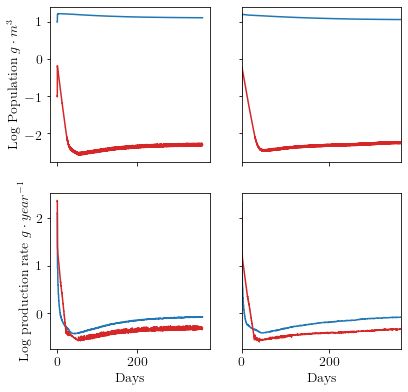

In [11]:
def moving_average(a, n=day_interval) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

m_a = day_interval
m_a_end = m_a - 1

time = np.linspace(0, 365, len(strategies))

eco_params_orig = ecosystem_parameters(eco.parameters.mass_vector, eco.spectral)
OG_layered_attack = eco_params_orig.layered_attack.copy()
flows_long = np.zeros((len(strategies), 2))
flows_long_more_res = np.zeros((len(strategies), 2))

for i in range(0, len(strategies)):
    layered_attack = periodic_layers[i % day_interval]
    T_G = graph_builder(eco, layered_attack = layered_attack, 
                  populations=populations[i], resources = resources[i], 
                  strategies = strategies[i])
    flows_long[i, 0] = T_G[1,0]
    flows_long[i, 1] = T_G[2,1]
    
    TG_M_R = graph_builder(eco, layered_attack = layered_attack, 
                  populations=populations_more_resources[i], resources = resources_more_resources[i], 
                  strategies = strategies_more_resources[i])
    
    flows_long_more_res[i, 0] = TG_M_R[1,0]
    flows_long_more_res[i, 1] = TG_M_R[2,1]


fig, ax = plt.subplots(2, 2, sharex='col', sharey = 'row')
fig.set_size_inches((16/2.54, 16/2.54))

ax[0,1].plot(time[0:-m_a_end], np.log10(populations[0:-m_a_end,0]), color = tableau20[0], label = '20g fish')
ax[0,1].plot(time[0:-m_a_end], np.log10(populations[0:-m_a_end,1]), color = tableau20[6], label = '8000g fish')
ax[1,1].plot(time[0:-m_a_end], np.log10(moving_average(flows_long[:,0])), color = tableau20[0], label = '20g fish')
ax[1,1].plot(time[0:-m_a_end], np.log10(moving_average(flows_long[:,1])), color = tableau20[6], label = '8000g fish')

ax[0,0].plot(time[0:-m_a_end], np.log10(populations_more_resources[0:-m_a_end,0]), color = tableau20[0], label = '20g fish')
ax[0,0].plot(time[0:-m_a_end], np.log10(populations_more_resources[0:-m_a_end,1]), color = tableau20[6], label = '8000g fish')
ax[1,0].plot(time[0:-m_a_end], np.log10(moving_average(flows_long_more_res[:,0])), color = tableau20[0], label = '20g fish')
ax[1,0].plot(time[0:-m_a_end], np.log10(moving_average(flows_long_more_res[:,1])), color = tableau20[6], label = '8000g fish')



ax[1, 0].set_ylabel('Log production rate $g \cdot year^{-1}$')

ax[0, 0].set_ylabel('Log Population $g \cdot m^3$')
ax[-1,0].set_xlabel("Days")
ax[1,-1].set_xlabel("Days")

ax[1,-1].set_xlim((0,365))

plt.savefig("pop_dyn_cons_long_short_night.png")

In [12]:
resources[364*96]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.57551402e-03, 3.29106527e-06, 1.87600941e-05,
       1.10749635e-03, 2.72927984e-03, 1.10711747e-03, 1.15356410e-03,
       2.09078790e-03, 2.13978484e-03, 2.00207523e-03, 3.73053751e-03,
       3.66396110e-03, 4.34836066e-03, 7.84314563e-03, 5.94851511e-03,
       1.01273114e-02, 1.43671066e-02, 1.04129029e-02, 5.27822610e-03,
       2.27426291e-03, 8.90136655e-04, 3.20820895e-04, 1.07051907e-04,
       3.30775205e-05, 9.49088829e-06, 2.53523248e-06, 6.32960722e-07,
       1.48323898e-07, 3.28003254e-08, 6.88425951e-09, 1.38071853e-09,
       2.66499570e-10, 4.99002948e-11, 9.13936784e-12, 1.65203315e-12,
       2.97440376e-13, 5.38565548e-14, 9.90356402e-15, 1.86805298e-15,
       3.65095061e-16, 7.46791888e-17, 1.61463868e-17, 3.72629710e-18,
       9.26642651e-19, 2.50562379e-19, 7.43108355e-20, 2.43698260e-20,
       8.90361296e-21, 3.64882019e-21, 1.68757162e-21, 8.85531915e-22,
      

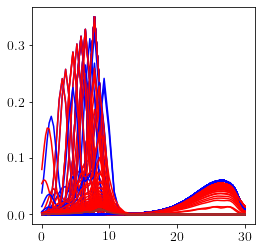

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(4,4))
for i in range(day,day+day_interval):
    plt.plot(eco.spectral.x, np.diff(np.cumsum(eco.spectral.M @ strategies[i][0]@eco.heat_kernels[0]), prepend = np.array([0])), color = 'blue')
    plt.plot(eco.spectral.x, np.diff(np.cumsum(eco.spectral.M @ strategies[i][1]@eco.heat_kernels[0]), prepend = np.array([0])), color = 'red')
    plt.plot(eco.spectral.x, np.diff(np.cumsum(eco.spectral.M @ resources[i]), prepend = np.array([0])), color = 'brown')

plt.show()
plt.savefig("mess_distributions.pdf")

In [14]:
np.diff(np.cumsum(eco.spectral.M @ strategies[i][1]@eco.heat_kernels[0]), prepend = np.array([0]))

array([0.00022105, 0.00022865, 0.0002464 , 0.0002736 , 0.00030868,
       0.00034957, 0.00039704, 0.00046157, 0.00056658, 0.00073043,
       0.00092821, 0.00110384, 0.0012926 , 0.00164246, 0.00210586,
       0.00249597, 0.00328277, 0.00495616, 0.00604938, 0.00639851,
       0.01024452, 0.01482486, 0.0119262 , 0.00599077, 0.00314897,
       0.00164745, 0.00122609, 0.00135273, 0.00165529, 0.00226434,
       0.00303436, 0.00411912, 0.00558551, 0.00731237, 0.00988832,
       0.01252069, 0.01644262, 0.0203024 , 0.02542581, 0.030106  ,
       0.03596931, 0.04080211, 0.04549147, 0.05018834, 0.05228235,
       0.05473442, 0.05596923, 0.05443248, 0.05308049, 0.0514572 ,
       0.04703645, 0.04020916, 0.03314827, 0.02723108, 0.02267884,
       0.0192565 , 0.01673045, 0.01496085, 0.01386918, 0.01341322])

In [15]:
from mpl_toolkits.axes_grid1 import ImageGrid

def heatmap_plotter(data, image_name, ext):
    fig = plt.figure(figsize=(16/2.54, 16/2.54))

    grid = ImageGrid(fig, 111,  # as in plt.subplot(111)
                     nrows_ncols=(1, len(data)),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="5%",
                     cbar_pad=0.05,
                     )

    # Add data to image grid
    i = 0
    for ax in grid:
        im = ax.imshow(data[i], vmin=0, cmap='seismic', extent=ext)
        x0, x1 = ax.get_xlim()
        y0, y1 = ax.get_ylim()
        ax.set_aspect((x1 - x0) / (y1 - y0))
        ax.set_xlabel("Time (Hours)")
        ax.set_ylabel("Depth (m)")

        i += 1

    # Colorbar
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)
    plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible

    #fig.colorbar(im, cax=cax)

    plt.savefig(image_name+".png", bbox_inches='tight')



In [16]:
np.diff(np.cumsum(eco.spectral.M @ strategies[i][0]@eco.heat_kernels[0]))

array([3.54195872e-06, 3.81306096e-06, 4.22212875e-06, 4.73052403e-06,
       5.27518401e-06, 5.81411782e-06, 6.46150311e-06, 7.65202638e-06,
       9.94555165e-06, 1.31359929e-05, 1.61787121e-05, 1.87008329e-05,
       2.19698355e-05, 3.19933149e-05, 3.93100055e-05, 4.52826700e-05,
       6.63712216e-05, 8.50814919e-05, 1.12054662e-04, 1.29047221e-04,
       2.32223973e-04, 2.35355109e-04, 3.98394947e-04, 4.88369799e-04,
       6.83886662e-04, 9.32585905e-04, 1.35403443e-03, 1.65496273e-03,
       2.56385349e-03, 3.17645722e-03, 4.58745791e-03, 5.94170355e-03,
       8.07170627e-03, 1.06129264e-02, 1.36837665e-02, 1.78040677e-02,
       2.20497549e-02, 2.75553389e-02, 3.28301976e-02, 3.88654907e-02,
       4.44478158e-02, 4.94867871e-02, 5.40198578e-02, 5.74192993e-02,
       5.91039201e-02, 6.03564452e-02, 5.99706980e-02, 5.75629178e-02,
       5.48252216e-02, 5.09603297e-02, 4.43871894e-02, 3.59289061e-02,
       2.77266438e-02, 2.11813454e-02, 1.65456480e-02, 1.34835353e-02,
      

In [17]:
np.diff(np.cumsum(eco.spectral.M @ (strategies[i][0]@eco.heat_kernels[0])), prepend = np.array([0]))

array([-8.87328885e-07,  3.31931914e-06, -1.82463962e-06,  6.50134743e-06,
       -1.09420213e-06,  9.83747066e-06,  2.67762923e-07,  1.28168674e-05,
        1.51754208e-06,  1.63996343e-05,  5.66348409e-06,  2.33283422e-05,
        1.07500621e-05,  3.00979206e-05,  2.22327298e-05,  4.78460101e-05,
        3.71084904e-05,  7.09659448e-05,  8.18334828e-05,  1.09591745e-04,
        1.35610981e-04,  2.15243879e-04,  2.58257105e-04,  3.64069172e-04,
        5.27204406e-04,  6.35098874e-04,  9.84340374e-04,  1.29429756e-03,
        1.71910116e-03,  2.50015688e-03,  3.24911873e-03,  4.53671488e-03,
        6.02223940e-03,  8.05842573e-03,  1.07127471e-02,  1.37421861e-02,
        1.79579233e-02,  2.22216326e-02,  2.78201700e-02,  3.31608144e-02,
        3.93065984e-02,  4.49746861e-02,  5.01260404e-02,  5.48096649e-02,
        5.82434795e-02,  6.01417974e-02,  6.15675138e-02,  6.12091502e-02,
        5.92648005e-02,  5.72986223e-02,  5.42586199e-02,  4.96274185e-02,
        4.45035491e-02,  

/home/jaem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


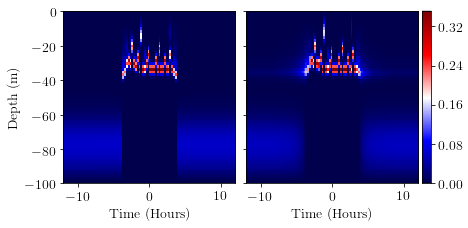

In [18]:
HM_C = np.zeros((eco.spectral.n, m_a))
HM_P = np.zeros((eco.spectral.n, m_a))
for i in range(day,day+day_interval):
    HM_C[:, i-(day)] = np.diff(np.cumsum(eco.spectral.M @ (strategies[i][0]@eco.heat_kernels[0])), prepend = np.array([0]))
    HM_P[:, i-(day)] = np.diff(np.cumsum(eco.spectral.M @ (strategies[i][1]@eco.heat_kernels[0])), prepend = np.array([0]))
heatmap_plotter([HM_C, HM_P], "short_night_heatmaps", [-12, 12, -100, 0])

/home/jaem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


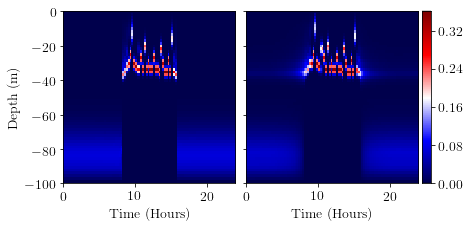

In [19]:
HM_C_MR = np.zeros((eco.spectral.n, m_a))
HM_P_MR = np.zeros((eco.spectral.n, m_a))
for i in range(day,day+day_interval):
    HM_C_MR[:, i-(day)] = np.diff(np.cumsum(eco.spectral.M @ (strategies_more_resources[i][0]@eco.heat_kernels[0])), prepend = np.array([0]))
    HM_P_MR[:, i-(day)] = np.diff(np.cumsum(eco.spectral.M @ (strategies_more_resources[i][1]@eco.heat_kernels[0])), prepend = np.array([0]))
heatmap_plotter([HM_C_MR, HM_P_MR], "short_night_heatmaps_MR", [0, 24, -100, 0])

In [20]:
new_spectral_obj = spectral_method(30, 120, segments = 1)

In [21]:
for i in range(day,day+day_interval):
    plt.figure(figsize=(4,4))

    plt.plot(eco.spectral.x[1:], np.diff(np.cumsum(eco.spectral.M @ strategies[i][0]@eco.heat_kernels[0])), color = 'blue')
    plt.plot(eco.spectral.x[1:], np.diff(np.cumsum(eco.spectral.M @ strategies[i][1]@eco.heat_kernels[0])), color = 'red')
    plt.plot(eco.spectral.x[1:],  np.diff(np.cumsum(eco.spectral.M @ resources[i])))
    plt.ylim((0,1))
    plt.savefig("images/images" + str(i) +".jpg")

    plt.close()

In [22]:
with imgio.get_writer(gif_path, mode='I') as writer:
    for i in range(day, day+day_interval):
        writer.append_data(imgio.imread(frames_path.format(i=i)))